# Машинное обучение

# Практическое задание 4

## Общая информация

Дата выдачи: 09.12.2024

Жёсткий дедлайн: 13.12.2024 23:59 MSK

## Оценивание и штрафы

Задание состоит из 2 частей. Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 16 баллов.

При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

# Часть  (10 баллов)

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [6]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: total: 969 ms
Wall time: 1 s
Train ROC-AUC 0.9894
Valid ROC-AUC 0.9080
Test ROC-AUC 0.9050


A bit less than a second

## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [7]:
results = {}

depths = range(1, 30, 2)

train_roc = []
test_roc = []

for d in depths:
    boosting = Boosting(base_model_params={"max_depth": d})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    train_roc.append(boosting.score(x_train, y_train))
    test_roc.append(boosting.score(x_test, y_test))

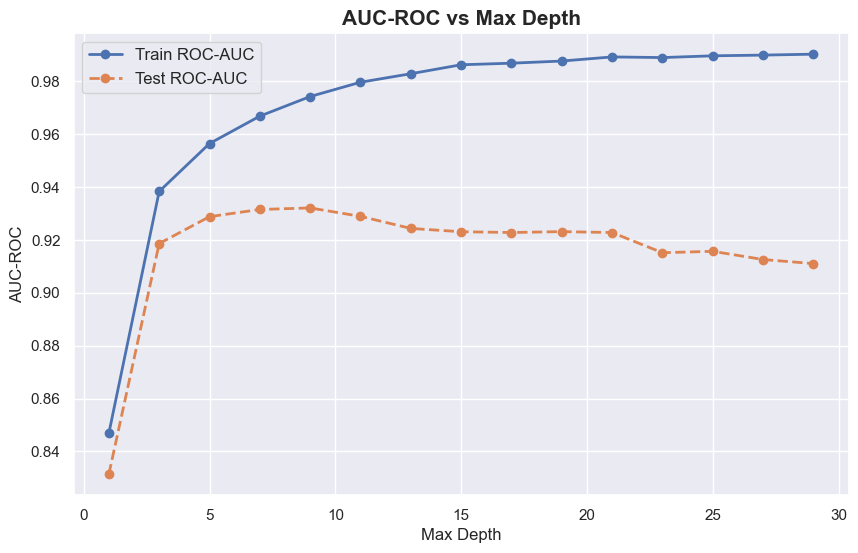

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_roc, label='Train ROC-AUC', marker='o', linestyle='-', linewidth=2)
plt.plot(depths, test_roc, label='Test ROC-AUC', marker='o', linestyle='--', linewidth=2)
plt.title("AUC-ROC vs Max Depth", weight="bold", size=15)
plt.xlabel("Max Depth", size=12)
plt.ylabel("AUC-ROC", size=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

The model with the best test ROC-AUC appears to occur at a shallower depth (approximately max_depth = 7-9), where the test ROC-AUC is at its peak before starting to decline. Train line continues to grow, but it's simply an overfitting  at this point.


## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [9]:
# pip install optuna

In [10]:
import optuna
import pandas as pd
from optuna.samplers import TPESampler
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Objective function for Optuna
def objective(trial):
    # hyperparameter search space
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-3, 1e-1)
    n_estimators = trial.suggest_categorical("n_estimators", [2 ** x for x in range(3, 7)])
    subsample = trial.suggest_float("subsample", 0.4, 0.8, step=0.2)
    max_depth = trial.suggest_categorical("max_depth", [2 ** x for x in range(1, 5)])
    min_samples_leaf = trial.suggest_categorical("min_samples_leaf", [1, 2, 4, 8])
    
    # train Boosting model
    boosting = Boosting(
        base_model_params={
            "max_depth": max_depth,
            "min_samples_leaf": min_samples_leaf
        },
        learning_rate=learning_rate,
        subsample=subsample,
        n_estimators=n_estimators
    )
    boosting.fit(x_train, y_train, x_valid, y_valid)
    
    # Return validation score
    score = boosting.score(x_valid, y_valid)
    return score

# Optuna optimization
study = optuna.create_study(direction="maximize", sampler=TPESampler())
study.optimize(objective, n_trials=10)

# best hyperparameters
best_params = study.best_params
best_score = study.best_value

# results
print("Best Hyperparameters:")
print(best_params)
print(f"Best Validation ROC-AUC Score: {best_score:.4f}")

# Save all trials to a DataFrame
results = pd.DataFrame(study.trials_dataframe())
results = results.sort_values("value", ascending=False)

# Show the top 3 results
print(results.head(3))

Best Hyperparameters:
{'learning_rate': 0.03030543140655856, 'n_estimators': 16, 'subsample': 0.4, 'max_depth': 16, 'min_samples_leaf': 8}
Best Validation ROC-AUC Score: 0.9373
   number     value             datetime_start          datetime_complete  \
4       4  0.937325 2024-12-10 18:59:29.911272 2024-12-10 18:59:31.118494   
0       0  0.936876 2024-12-10 18:59:08.300300 2024-12-10 18:59:17.018987   
6       6  0.936774 2024-12-10 18:59:32.237216 2024-12-10 18:59:38.650829   

                duration  params_learning_rate  params_max_depth  \
4 0 days 00:00:01.207222              0.030305                16   
0 0 days 00:00:08.718687              0.006686                16   
6 0 days 00:00:06.413613              0.012681                16   

   params_min_samples_leaf  params_n_estimators  params_subsample     state  
4                        8                   16               0.4  COMPLETE  
0                        1                   64               0.6  COMPLETE  
6      

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

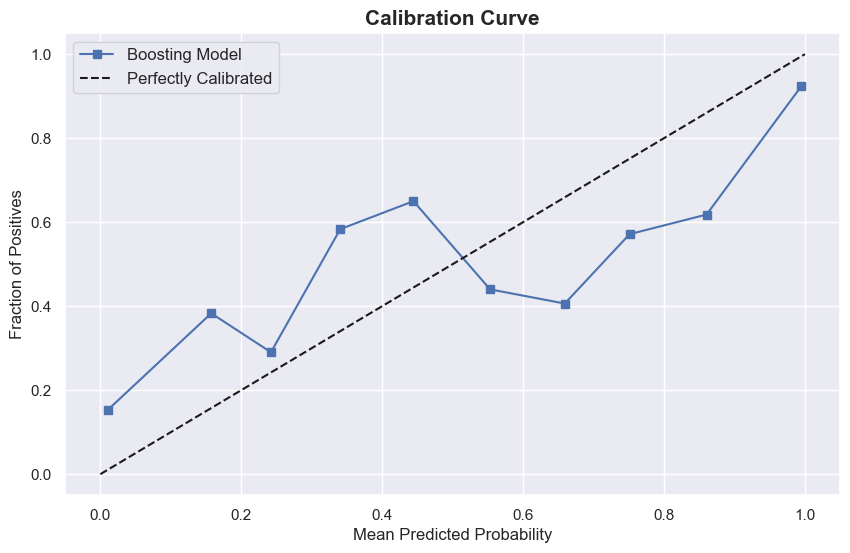

In [11]:
from sklearn.calibration import calibration_curve

best_model = Boosting(
    base_model_params={"max_depth": best_params["max_depth"], "min_samples_leaf": best_params["min_samples_leaf"]},
    learning_rate=best_params["learning_rate"],
    subsample=best_params["subsample"],
    n_estimators=best_params["n_estimators"],
)
best_model.fit(x_train, y_train, x_valid, y_valid)

#  probabilities for the test set
y_test_proba = best_model.predict_proba(x_test)[:, 1]  # Use probabilities for the positive class

# calibration curve
fraction_of_positives, mean_predicted_prob = calibration_curve(y_test, y_test_proba, n_bins=10)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_prob, fraction_of_positives, "s-", label="Boosting Model")
plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
plt.title("Calibration Curve", weight="bold", size=15)
plt.xlabel("Mean Predicted Probability", size=12)
plt.ylabel("Fraction of Positives", size=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

Well, bossting is not good when it comes to predicted probabilities.

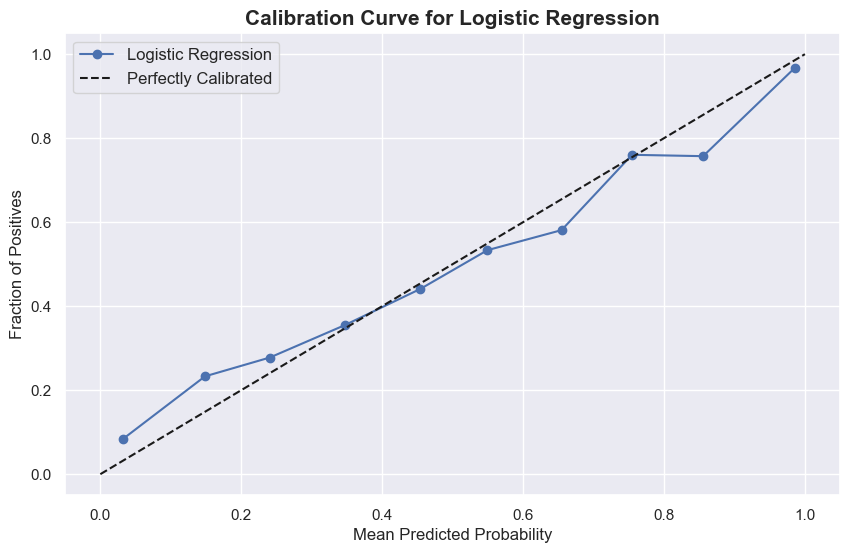

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, solver="lbfgs") # looked this one up - works better than my variant in HA3
log_reg.fit(x_train, y_train)

# Predict probabilities using Logistic Regression
y_test_proba_logreg = log_reg.predict_proba(x_test)[:, 1]

# calibration curve for Logistic Regression
fraction_of_positives, mean_predicted_prob = calibration_curve(y_test, y_test_proba_logreg, n_bins=10)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_prob, fraction_of_positives, "o-", label="Logistic Regression")
plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
plt.title("Calibration Curve for Logistic Regression", weight="bold", size=15)
plt.xlabel("Mean Predicted Probability", size=12)
plt.ylabel("Fraction of Positives", size=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

Well, logistic regression does better, as it by default works with probabilities, unlike boosting. Additionally, bossting can overfit, as it usually requires post-calibration as well (Platt Scaling or Isotonic Regression), while logistic regression is naturally calibrated ( works with probabilities from the beginning).

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

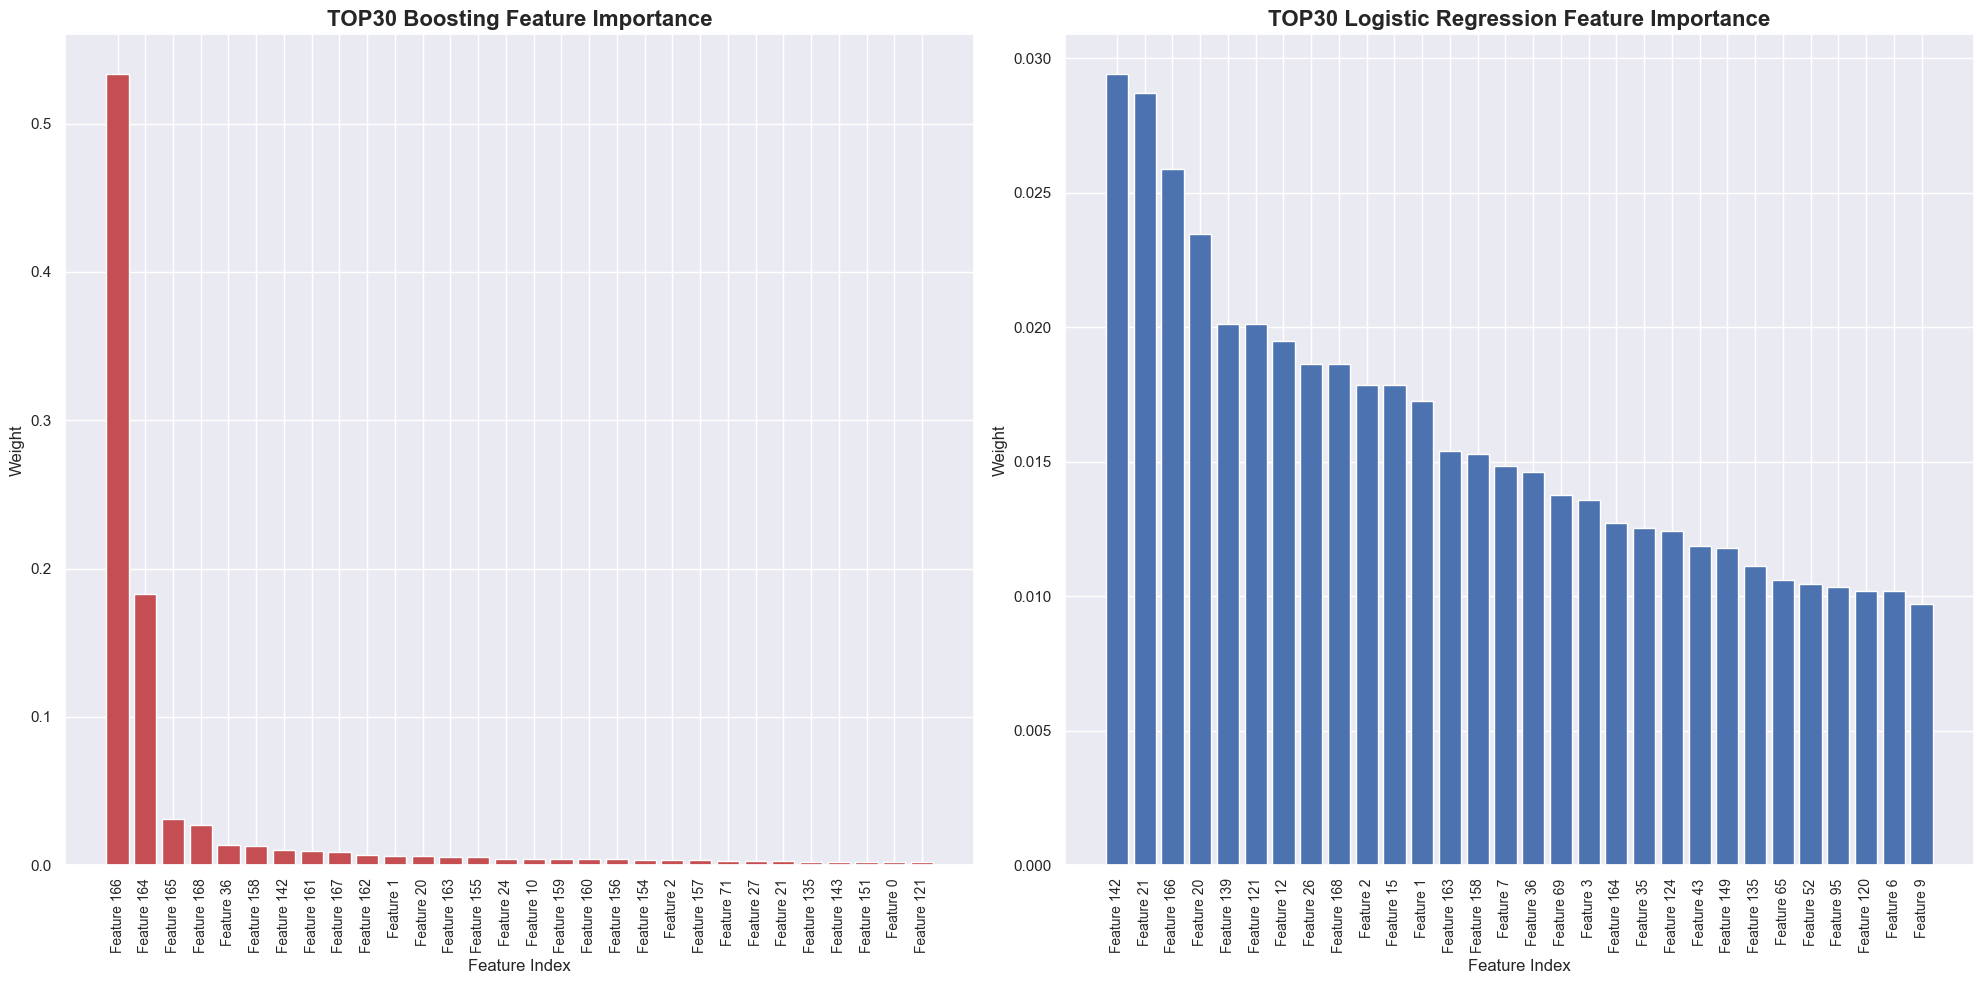

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Boosting Feature Importance
boosting_weights = boosting.feature_importances_
boosting_top_indices = np.argsort(boosting_weights)[-30:][::-1]  # Top 30 indices
boosting_top_weights = boosting_weights[boosting_top_indices]
axs[0].bar(np.arange(30), boosting_top_weights, color='r')
axs[0].set_title('TOP30 Boosting Feature Importance', weight='bold', size=16)
axs[0].set_xlabel('Feature Index', size=12)
axs[0].set_ylabel('Weight', size=12)
axs[0].set_xticks(np.arange(30))
axs[0].set_xticklabels([f'Feature {i}' for i in boosting_top_indices], rotation=90, fontsize=10)

# Logistic Regression Feature Importance
lr_weights = np.abs(log_reg.coef_[0]) / np.sum(np.abs(log_reg.coef_[0]))  # Normalize weights
lr_top_indices = np.argsort(lr_weights)[-30:][::-1]  # Top 30 indices
lr_top_weights = lr_weights[lr_top_indices]
axs[1].bar(np.arange(30), lr_top_weights, color='b')
axs[1].set_title('TOP30 Logistic Regression Feature Importance', weight='bold', size=16)
axs[1].set_xlabel('Feature Index', size=12)
axs[1].set_ylabel('Weight', size=12)
axs[1].set_xticks(np.arange(30))
axs[1].set_xticklabels([f'Feature {i}' for i in lr_top_indices], rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

From the feature importance values, it is evident that boosting focuses on highlighting a few key features, whereas logistic regression assigns roughly equal importance to all features.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [14]:
results.iloc[0, :]

number                                              4
value                                        0.937325
datetime_start             2024-12-10 18:59:29.911272
datetime_complete          2024-12-10 18:59:31.118494
duration                       0 days 00:00:01.207222
params_learning_rate                         0.030305
params_max_depth                                   16
params_min_samples_leaf                             8
params_n_estimators                                16
params_subsample                                  0.4
state                                        COMPLETE
Name: 4, dtype: object

In [15]:
# Filter features based on importance
threshold = 0.05
boosting_weights = boosting.feature_importances_
important_feature_indices = np.where(boosting_weights >= threshold)[0]
print(f"Number of selected features: {len(important_feature_indices)}")

# Keep only important features
x_train_filtered = x_train[:, important_feature_indices]
x_valid_filtered = x_valid[:, important_feature_indices]
x_test_filtered = x_test[:, important_feature_indices]

# Retrain Boosting model
boosting_filtered = Boosting(
    base_model_params={"max_depth": 4, "min_samples_leaf": 2},
    learning_rate=0.1,
    subsample=0.8,
    n_estimators=50
)
boosting_filtered.fit(x_train_filtered, y_train, x_valid_filtered, y_valid)

# Evaluate the model
train_score = boosting_filtered.score(x_train_filtered, y_train)
valid_score = boosting_filtered.score(x_valid_filtered, y_valid)
test_score = boosting_filtered.score(x_test_filtered, y_test)

print(f"Train ROC-AUC: {train_score:.4f}")
print(f"Validation ROC-AUC: {valid_score:.4f}")
print(f"Test ROC-AUC: {test_score:.4f}")

Number of selected features: 2
Train ROC-AUC: 0.9414
Validation ROC-AUC: 0.9180
Test ROC-AUC: 0.9217


Well, it didn't get better. (look at the validation score, as it is the one in the "results" of Optuna)

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [16]:
from sklearn.metrics import roc_auc_score

# probabilities
boosting_probs = boosting.predict_proba(x_valid)[:, 1]
logreg_probs = log_reg.predict_proba(x_valid)[:, 1]

# Blend the probabilities (average with equal weights)
blend_probs = 0.5 * boosting_probs + 0.5 * logreg_probs

# Calculate ROC-AUC
blend_score = roc_auc_score(y_valid, blend_probs)

# model scores for comparison
boosting_score = roc_auc_score(y_valid, boosting_probs)
logreg_score = roc_auc_score(y_valid, logreg_probs)

print(f"Boosting ROC-AUC: {boosting_score:.4f}")
print(f"Logistic Regression ROC-AUC: {logreg_score:.4f}")
print(f"Blended ROC-AUC: {blend_score:.4f}")

Boosting ROC-AUC: 0.9146
Logistic Regression ROC-AUC: 0.9420
Blended ROC-AUC: 0.9432


Well, again- great idea, just not for our case.

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [17]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

# Train CatBoost
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=8, #try to use smth around previously found optimal
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=100,
    random_seed=666 #yep, now only like that))
)
catboost_model.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=50, verbose=False)

# Predict and evaluate
catboost_probs = catboost_model.predict_proba(x_valid)[:, 1]
catboost_score = roc_auc_score(y_valid, catboost_probs)

# Compare
boosting_probs = boosting.predict_proba(x_valid)[:, 1]
boosting_score = roc_auc_score(y_valid, boosting_probs)

print(f"CatBoost ROC-AUC: {catboost_score:.4f}")
print(f"Previous boosting: {boosting_score:.4f}")

CatBoost ROC-AUC: 0.9470
Previous boosting: 0.9146


Look at that - power of Yandex in action))

# Часть 2 (6 баллов)

In [18]:
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [19]:
data[0:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [20]:
target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [21]:
X = data
y = target

In [22]:
X.shape, y.shape

((506, 13), (506,))

### Вычисление bias и variance с помощью бутстрапа
На лекции была выведено следующая формула, показывающая, как можно представить ошибку алгоритма регрессии в виде суммы трех компонент:
$$
L(\mu) = 
    \mathbb{E}_{x, y}\bigl[\mathbb{E}_{X}\bigl[ (y - \mu(X)(x))^2 \bigr]\bigr] = 
$$
$$
    \underbrace{\mathbb{E}_{x, y}\bigl[(y - \mathbb{E}[y|x] )^2\bigr]}_{\text{шум}} + \underbrace{\mathbb{E}_{x}\bigl[(\mathbb{E}_{X}[\mu(X)(x)] - \mathbb{E}[y|x] )^2\bigr]}_{\text{смещение}} +
    \underbrace{\mathbb{E}_{x}\bigl[\mathbb{E}_{X}\bigl[(\mu(X)(x) - \mathbb{E}_{X}[\mu(X)(x)] )^2\bigr]\bigr]}_{\text{разброс}},
$$
* $\mu(X)$ — алгоритм, обученный по выборке $X = \{(x_1, y_1), \dots (x_\ell, y_\ell)\}$;
* $\mu(X)(x)$ — ответ алгоритма, обученного по выборке $X$, на объекте $x$;
* $\mathbb{E}_{X}$ — мат. ожидание по всем возможным выборкам;
* $\mathbb{E}_{X}[\mu(X)(x)]$ — "средний" ответ алгоритма, обученного по всем возможным выборкам $X$, на объекте $x$.
    
С помощью этой формулы мы можем анализировать свойства алгоритма обучения модели $\mu$, если зададим вероятностную модель порождения пар $p(x, y)$.

В реальных задачах мы, конечно же, не знаем распределение на парах объект - правильный ответ. Однако у нас есть набор семплов из этого распределения (обучающую выборка), и мы можем использовать его, чтобы оценивать математические ожидания. Для оценки мат. ожиданий по выборкам мы будем пользоваться бутстрэпом - методом генерации "новых" выборок из одной с помощью выбора объектов с возвращением. Разберем несколько шагов на пути к оценке смещения и разброса.

#### Приближенное вычисление интегралов
На занятиях мы разбирали примеры аналитического вычисления смещения и разброса нескольких алгоритмов обучения. Для большинства моделей данных и алгоритмов обучения аналитически рассчитать математические ожидания в формулах не удастся. Однако мат. ожидания можно оценивать приближенно. Чтобы оценить математическое ожидание $\mathbb{E}_{\bar z} f(\bar z)$ функции от многомерной случайной величины $\bar z = (z_1, \dots, z_d)$, $\bar z \sim p(\bar z)$, можно сгенерировать выборку из распределения $p(\bar z)$ и усреднить значение функции на элементах этой выборки:
$$\mathbb{E}_{\bar z} f(z) = \int f(\bar z) p(\bar z) d \bar z \approx \frac 1 m \sum_{i=1}^m f(\bar z_i), \, \bar z_i \sim p(\bar z), i = 1, \dots, m.$$

Например, оценим $\mathbb{E}_z z^2,$ $z \sim \mathcal{N}(\mu=5, \sigma=3)$ (из теории вероятностей мы знаем, что
$\mathbb{E}_z z^2 = \sigma^2 + \mu^2 = 34$):

In [23]:
z = np.random.normal(loc=5, scale=3, size=1000)
(z**2).mean()

32.05064507830448

#### Оценивание $\mathbb{E}_{x, y}$
Оценить мат. ожидания по $x$ и по $x, y$, встречающиеся во всех трех компонентах разложения, несложно, потому что у нас есть выборка объектов из распределения данных $p(x, y)$:
$$ \mathbb{E}_{x} f(x) \approx \frac 1 N \sum_{i=1}^N f(x_i), \quad
\mathbb{E}_{x, y} f(x, y) \approx \frac 1 N \sum_{i=1}^N f(x_i, y_i),$$
где $N$ - число объектов в выборке, $\{(x_i, y_i)\}_{i=1}^N$ - сама выборка. 

#### Оценивание $\mathbb{E}_X$ с помощью бутстрапа
Чтобы оценить мат. ожидание по $X$, нам понадобится выборка из выборок:
$$\mathbb{E}_X f(X) \approx \frac 1 s \sum_{j=1}^s f(X_j),$$
где $X_j$ - $j$-я выборка. Чтобы их получить, мы можем воспользоваться бутстрапом - методом генерации выборок на основе выбора объектов с возвращением. Чтобы составить одну выборку, будем $N$ раз выбирать индекс объекта $i \sim \text{Uniform}(1 \dots N)$ и добавлять $i$-ю пару (объект, целевая переменная) в выборку. В результате в каждой выборке могут появиться повторяющиеся объекты, а какие-то объекты могут вовсе не войти в некоторые выборки.

#### Итоговый алгоритм оценки смещения и разброса алгоритма $a$
1. Сгенерировать $s$ выборок $X_j$ методом бутстрапа.
1. На каждой выборке $X_j$ обучить алгоритм $a_j$.
1. Для каждой выборки $X_j$ определить множество объектов $T_j$, не вошедших в нее (out-of-bag). Вычислить предсказания алгоритма $a_j$ на объектах $T_j$. 

Поскольку у нас есть только один ответ для каждого объекта, мы будем считать шум равным 0, а $\mathbb{E}[y|x]$ равным имеющемуся правильному ответу для объекта $x$. 

Итоговые оценки:
* Смещение: для одного объекта - квадрат разности среднего предсказания и правильного ответа. Среднее предсказание берется только по тем алгоритмам $a_j$, для которых этот объект входил в out-of-bag выборку $T_j$. Для получения общего смещения выполнить усреденение смещений по объектам.
* Разброс: для одного объекта - выборочная дисперсия предсказаний алгоритмов $a_j$, для которых этот объект входил в out-of-bag выборку $T_j$. Для получения общего разброса выполнить усреденение разбросов по объектам.
* Ошибка $L$: усреднить квадраты разностей предсказания и правильного ответа по всем выполненным предсказаниям для всех объектов.

В результате должно получиться, что ошибка приблизительно равна сумме смещения и разброса!

Алгоритм также вкратце описан по [ссылке](https://web.engr.oregonstate.edu/~tgd/classes/534/slides/part9.pdf) (слайды 19-21).

__1. (1.5 балла)__

Реализуйте описанный алгоритм. Обратите внимание, что если объект не вошел ни в одну из out-of-bag выборок, учитывать его в вычислении итоговых величин не нужно. Как обычно, разрешается использовать только один цикл - по выборкам (от 0 до num_runs-1).

In [24]:
def compute_bias_variance(model, X, y, num_runs=100):
    """
    Compute bias, variance, and error of a model using bootstrap.

    :param model: Estimator with fit(...) and predict(...) methods
    :param X: Feature matrix, shape [n_samples, n_features]
    :param y: Target array, shape [n_samples]
    :param num_runs: Number of bootstrap samples

    :return: bias (float), variance (float), error (float)
    """
    n_samples = X.shape[0]
    pred_sums = np.zeros(n_samples)
    pred_sums_squared = np.zeros(n_samples)
    counts = np.zeros(n_samples)
    total_error = 0

    for _ in range(num_runs):
        # Generate bootstrap indices and OOB indices
        bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)
        oob_indices = np.setdiff1d(np.arange(n_samples), bootstrap_indices)

        # Train model on bootstrap sample
        X_bootstrap, y_bootstrap = X[bootstrap_indices], y[bootstrap_indices]
        model.fit(X_bootstrap, y_bootstrap)

        # Predict on OOB sample
        if len(oob_indices) > 0:
            X_oob, y_oob = X[oob_indices], y[oob_indices]
            predictions = model.predict(X_oob)

            # Update sums for bias and variance calculation
            pred_sums[oob_indices] += predictions
            pred_sums_squared[oob_indices] += predictions ** 2
            counts[oob_indices] += 1

            # sTD
            total_error += ((predictions - y_oob) ** 2).sum()

    # Filter for OOB presence
    valid_indices = counts > 0
    mean_predictions = pred_sums[valid_indices] / counts[valid_indices]
    mean_predictions_squared = pred_sums_squared[valid_indices] / counts[valid_indices]
    true_values = y[valid_indices]

    # Calculate bias, variance, and error
    bias = np.mean((mean_predictions - true_values) ** 2)
    variance = np.mean(mean_predictions_squared - mean_predictions ** 2)
    error = total_error / np.sum(valid_indices)

    return bias, variance, error

__2. (0 баллов)__

Оцените смещение, разброс и ошибку для трех алгоритмов с гиперпараметрами по умолчанию: линейная регрессия, решающее дерево, случайный лес.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Compute bias, variance, and error
results = {}
for name, model in models.items():
    bias, variance, error = compute_bias_variance(model, X, y, num_runs=50)
    results[name] = {"Bias": bias, "Variance": variance, "Error": error}

# Display results
print("\nSummary:")
for name, metrics in results.items():
    print(f"{name}: {metrics}")



Summary:
Linear Regression: {'Bias': 24.00961832595621, 'Variance': 0.8952913528569787, 'Error': 456.44811912895}
Decision Tree: {'Bias': 11.239653526557898, 'Variance': 12.254474999078571, 'Error': 431.5831422924901}
Random Forest: {'Bias': 11.15246157062763, 'Variance': 2.1906997999973568, 'Error': 252.43037268577072}


__3. (0.5 баллов)__
Проанализируйте полученный результат. Согласуются ли полученные результаты с теми, что мы обсуждали на занятиях (с комментарием)?

__Your answer here:__

_As the simpliest regression, Linear has the least variance, the highest bias. FOr more advanced models, variance is indeed greater. Well, Random forest doesn't perform better that Decision Tree in terms of bias ( may be not enough obs.), however, it wins in terms of variabe and like " a lot"._

__4. (0.5 баллов)__
Постройте бэггинг над всеми тремя моделями (линейная регрессия, решающее дерево, случайный лес). Вспомните обсуждение с лекции о том, во сколько раз в теории бэггинг уменьшает разброс базового алгоритма. Выполняется ли это в ваших экспериментах? Если нет, поясните, почему.

__Your answer here:__

In [26]:
from tqdm import tqdm
from sklearn.ensemble import BaggingRegressor
# Define models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

# Initialize results DataFrame
results = pd.DataFrame(columns=["Model", "Bias", "Variance", "Error"])

# Evaluate each model with Bagging
for i, model in enumerate(tqdm(models, desc="Processing Models")):
    reg = BaggingRegressor(estimator=model, n_estimators=50, random_state=42)
    
    # Compute bias, variance, and error
    avg_bias, avg_var, avg_error = compute_bias_variance(reg, X, y, num_runs=50)
    
    # Save results
    model_name = type(model).__name__
    results.loc[i] = [model_name, avg_bias, avg_var, avg_error]

print(results)

Processing Models: 100%|██████████| 3/3 [07:36<00:00, 152.03s/it]

                   Model       Bias  Variance       Error
0       LinearRegression  23.748939  0.865930  455.286179
1  DecisionTreeRegressor  11.110538  2.282613  244.331488
2  RandomForestRegressor  11.799171  1.427763  238.692981


In theory, variance should decrease by a factor of 
n, but this assumes uncorrelated errors (is rarely true in practice). Thus, bagging tends to perform best on smaller datasets (less chances of correlations). In our case, variance indeed decreased significantly for DecisionTree (devided by 6) and nearly halved for RandomForest. As expected, bias remained largely unchanged, just as highlighted in the lecture.

### Визуализация предсказаний базовых алгоритмов бэггинга

В материалах лекций можно найти изображение, похожее на мишень - визуализация алгоритмов с разным смещением и разным разбросом. В центре "мишени" - правильный ответ, а "попадания" - предсказания алгоритмов, обученных по разным выборкам. Построим похожее изображение на наших данных для трех алгоритмов. Наши "мишени" будут одномерными, потому что мы решаем задачу одномерной регрессии.

__5. (1.5 балла)__

Реализуйте функцию plot_predictions. Она должна выполнять следующие действия:
1. Случайно выбрать num_test_objects пар объект-целевая переменная из выборки X, y. Получится две выборки: маленькая X_test, y_test (выбранные тестовые объекты) и X_train, y_train (остальные объекты).
1. Сгенерировать num_runs выборок методом бутстарапа из X_train, y_train. На каждой выборке обучить алгоритм regressor и сделать предсказания для X_test.
1. Нарисовать scatter-график. По оси абсцисс - объекты тестовой выборки (номера от 0 до num_test_objects-1), по оси ординат - предсказания. В итоге получится num_test_objects столбиков с точками. Для каждого тестового объекта надо отметить одним цветом все предсказания для него, а также черным цветом отметить правильный ответ.
1. Подпишите оси и название графика (аргумент title).

In [27]:
def visualize_predictions(models, X, y, num_runs=10, num_test_objects=10, title="Model Prediction Visualization"):
    """
    Visualize predictions of regressors trained on bootstrap samples.
    """
    # random test objects
    test_indices = np.random.choice(len(X), num_test_objects, replace=False)
    X_test, y_test = X[test_indices], y[test_indices]
    train_mask = np.ones(len(X), dtype=bool)
    train_mask[test_indices] = False
    X_train, y_train = X[train_mask], y[train_mask]
    
    # figure
    fig, axes = plt.subplots(1, len(models), figsize=(20, 6), sharey=True)
    fig.suptitle(title, fontsize=18, weight="bold")
    
    # Iterate over models and predictions
    for ax, model in zip(axes, models):
        model_name = type(model).__name__
        test_preds = {i: [] for i in range(num_test_objects)}
        
        # bootstrap samples, predictions
        for _ in range(num_runs):
            bootstrap_indices = np.random.choice(len(X_train), len(X_train), replace=True)
            X_boot, y_boot = X_train[bootstrap_indices], y_train[bootstrap_indices]
            model.fit(X_boot, y_boot)
            preds = model.predict(X_test)

            for i in range(num_test_objects):
                test_preds[i].append(preds[i])
        
        # scatter plot for predictions and true values
        for i in range(num_test_objects):
            ax.scatter([i] * num_runs, test_preds[i], alpha=0.6, label="Predictions" if i == 0 else "", color="blue")
        
        ax.scatter(range(num_test_objects), y_test, color="red", s=50, label="True Values", zorder=5)
        ax.set_title(model_name, fontsize=14, weight="bold")
        ax.set_xlabel("Test Object Index", fontsize=12)
        ax.grid(True)
    
    # Add common y-axis label and legend
    axes[0].set_ylabel("Predicted Value", fontsize=12)
    axes[0].legend(loc="upper left", fontsize=10, frameon=False)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

__6. (0 баллов)__

Нарисуйте графики для линейной регрессии, решающего дерева и случайного леса. Нарисуйте три графика в строчку (это можно сделать с помощью plt.subplot) с одинаковой осью ординат (это важно для понимания масштаба разброса у разных алгоритмов):

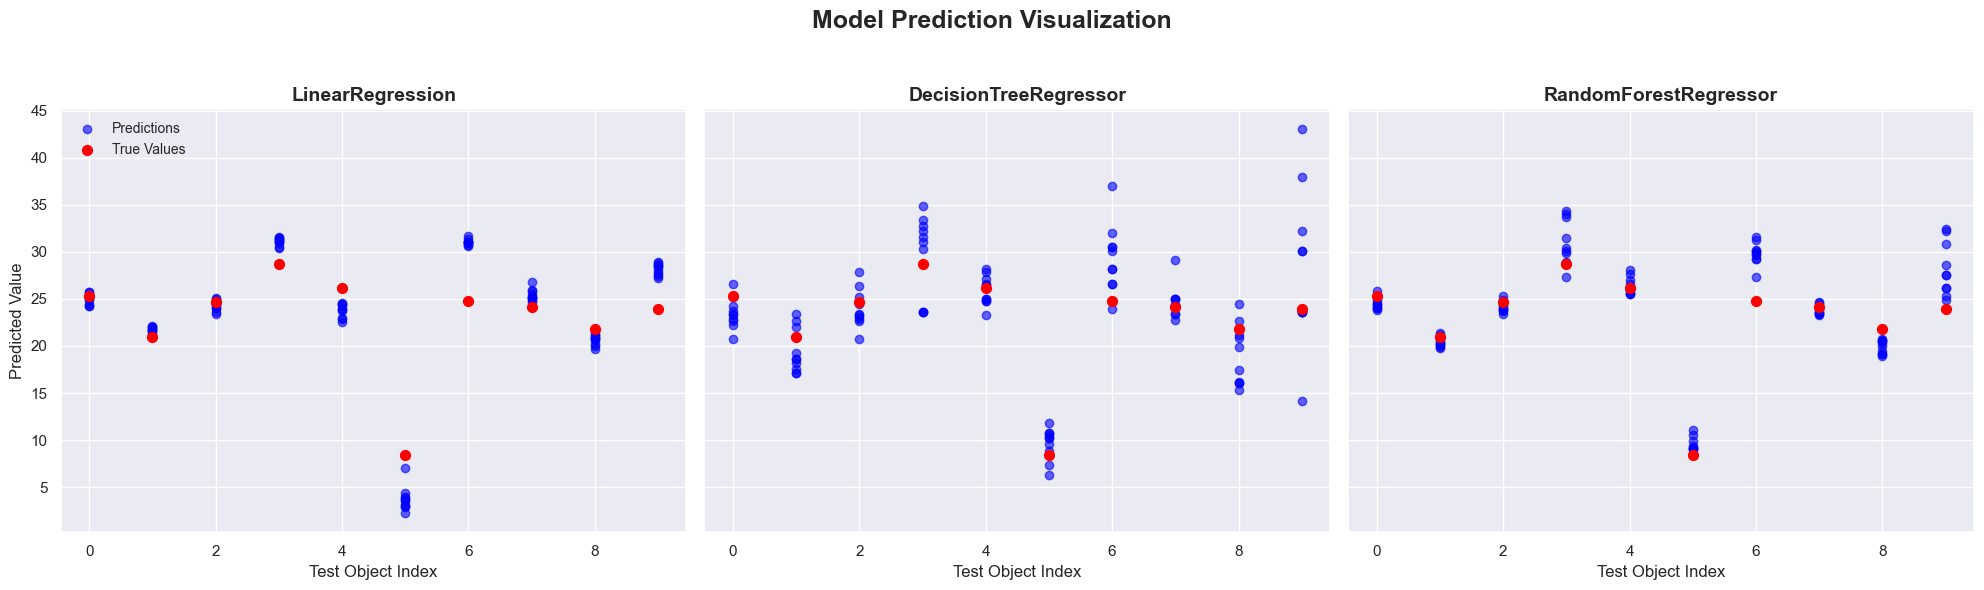

In [28]:
visualize_predictions(models, X, y)

__7. (0.5 баллов)__

Для каждого графика прокомментируйте, как он характеризует смещение и разброс соответствующего алгоритма. 

__Your answer here:__
- LinearRegression: High Bias, Low Variance- 
DecisionTree:Mediume Bias, High Variance- 
RandomForest: Low BiasMediumle Variance

### Изменение bias и variance при изменении гиперпараметров

__8. (0 баллов)__

Постройте графики зависимости смещения и разброса от гиперпараметров решающего дерева max_depth (от 1 до 10) и max_features (от 1 до X.shape[1]):

Evaluating max_depth...


Depth Progress: 100%|██████████| 10/10 [00:01<00:00,  5.94it/s]


Evaluating max_features...


Feature Progress: 100%|██████████| 13/13 [00:02<00:00,  4.77it/s]


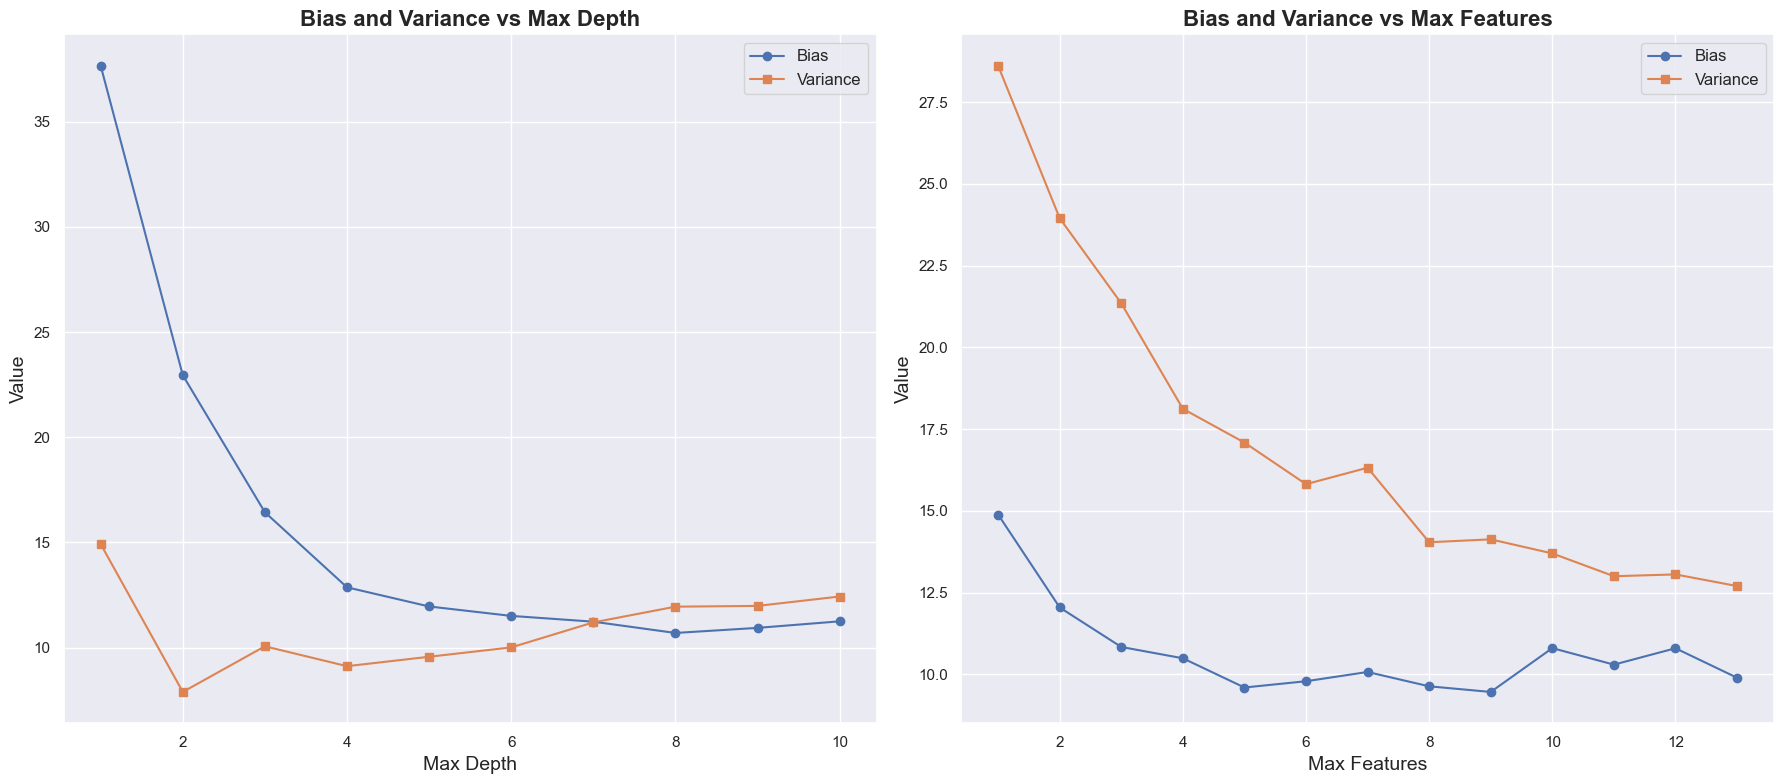

In [29]:
# ranges for hyperparameters
depth_range = np.arange(1, 11)
feature_range = np.arange(1, X.shape[1] + 1)

depth_results = {"bias": [], "variance": []}
feature_results = {"bias": [], "variance": []}

# Compute bias and variance for max_depth
print("Evaluating max_depth...")
for depth in tqdm(depth_range, desc="Depth Progress"):
    bias, variance, _ = compute_bias_variance(DecisionTreeRegressor(max_depth=depth), X, y)
    depth_results["bias"].append(bias)
    depth_results["variance"].append(variance)

# Compute bias and variance for max_features
print("Evaluating max_features...")
for feature in tqdm(feature_range, desc="Feature Progress"):
    bias, variance, _ = compute_bias_variance(DecisionTreeRegressor(max_features=feature), X, y)
    feature_results["bias"].append(bias)
    feature_results["variance"].append(variance)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# max_depth
axes[0].plot(depth_range, depth_results["bias"], label="Bias", marker="o")
axes[0].plot(depth_range, depth_results["variance"], label="Variance", marker="s")
axes[0].set_title("Bias and Variance vs Max Depth", fontsize=16, weight="bold")
axes[0].set_xlabel("Max Depth", fontsize=14)
axes[0].set_ylabel("Value", fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True)

# max_features
axes[1].plot(feature_range, feature_results["bias"], label="Bias", marker="o")
axes[1].plot(feature_range, feature_results["variance"], label="Variance", marker="s")
axes[1].set_title("Bias and Variance vs Max Features", fontsize=16, weight="bold")
axes[1].set_xlabel("Max Features", fontsize=14)
axes[1].set_ylabel("Value", fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

__9. (0 баллов)__

Постройте графики зависимости смещения и разброса от n_estimators (по сетке 2**np.arange(1, 10)) для случайного леса и градиентного бустинга:

Evaluating models...


Estimators Progress: 100%|██████████| 9/9 [05:48<00:00, 38.74s/it]


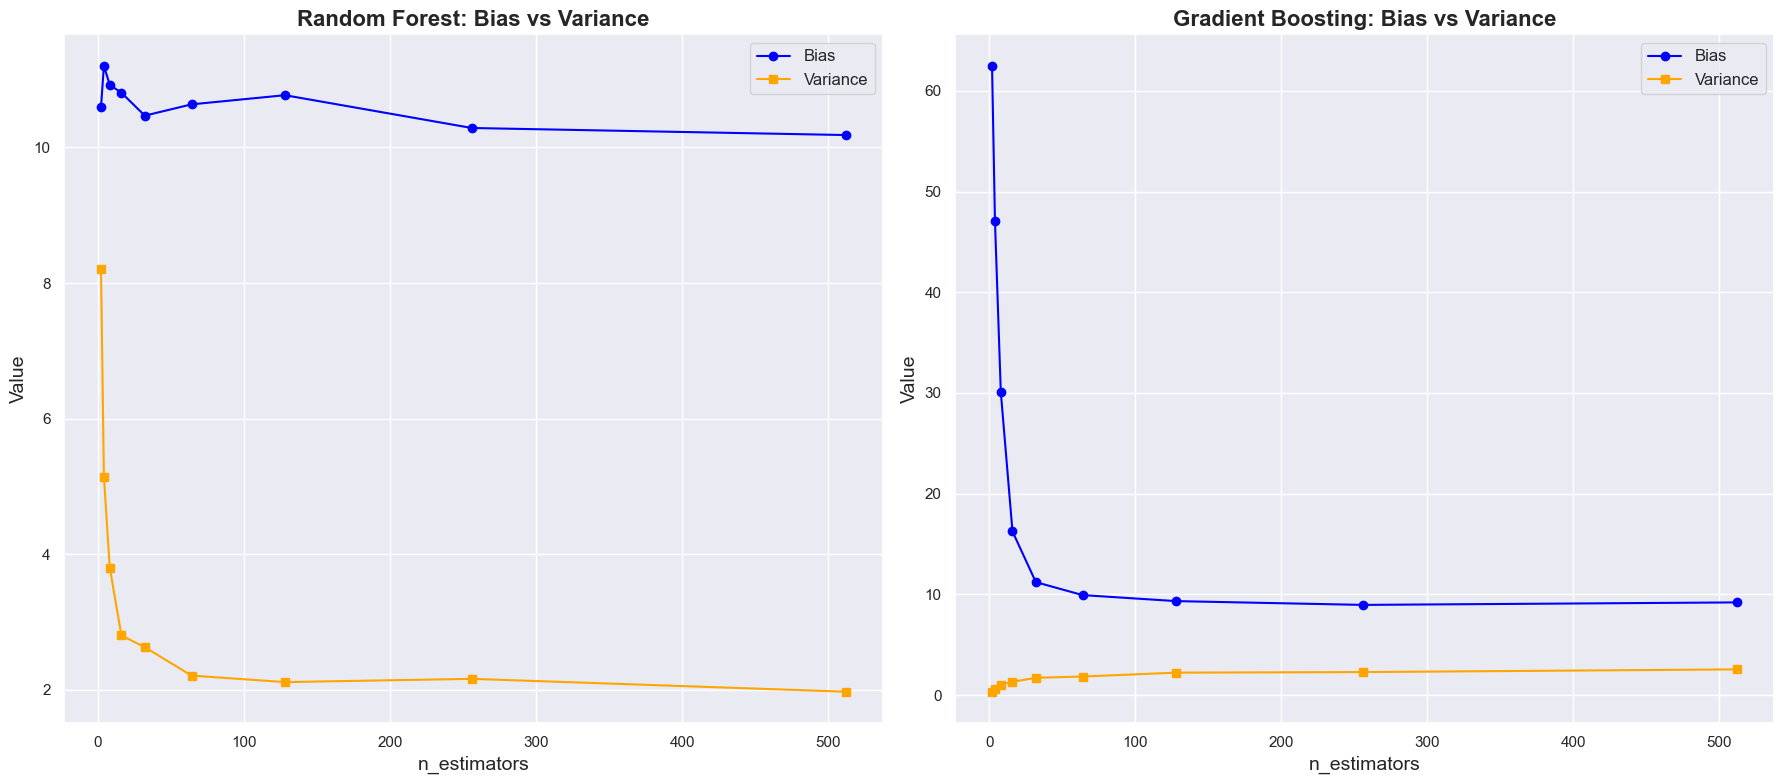

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
estimators = 2 ** np.arange(1, 10)

results = {
    "RandomForest": {"bias": [], "variance": []},
    "GradientBoosting": {"bias": [], "variance": []}
}

# Compute bias and variance for both models
print("Evaluating models...")
for param in tqdm(estimators, desc="Estimators Progress"):
    # Random Forest
    rf_bias, rf_var, _ = compute_bias_variance(RandomForestRegressor(n_estimators=param), X, y)
    results["RandomForest"]["bias"].append(rf_bias)
    results["RandomForest"]["variance"].append(rf_var)

    # Gradient Boosting
    gb_bias, gb_var, _ = compute_bias_variance(GradientBoostingRegressor(n_estimators=param), X, y)
    results["GradientBoosting"]["bias"].append(gb_bias)
    results["GradientBoosting"]["variance"].append(gb_var)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Random Forest Plot
axes[0].plot(estimators, results["RandomForest"]["bias"], label="Bias", marker="o", color="blue")
axes[0].plot(estimators, results["RandomForest"]["variance"], label="Variance", marker="s", color="orange")
axes[0].set_title("Random Forest: Bias vs Variance", fontsize=16, weight="bold")
axes[0].set_xlabel("n_estimators", fontsize=14)
axes[0].set_ylabel("Value", fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True)

# Gradient Boosting Plot
axes[1].plot(estimators, results["GradientBoosting"]["bias"], label="Bias", marker="o", color="blue")
axes[1].plot(estimators, results["GradientBoosting"]["variance"], label="Variance", marker="s", color="orange")
axes[1].set_title("Gradient Boosting: Bias vs Variance", fontsize=16, weight="bold")
axes[1].set_xlabel("n_estimators", fontsize=14)
axes[1].set_ylabel("Value", fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

__10. (1.5 балла)__

Прокомментируйте графики (всего 4 графика): почему они имеют такой вид.

__Your answer here:__

Here’s an expanded version with additional insights:

1. As the depth of the tree increases, it reduces the bias, resulting in more accurate predictions. However, this comes with the risk of overfitting, as deeper trees tend to capture noise in the data rather than just the underlying patterns.

2. As the number of features considered during splitting increases, the algorithm's variance reduces. This makes sense since the model has access to more information, making it less likely to produce varying predictions across different splits. However, this can sometimes lead to reduced diversity among trees in an ensemble.

3. Increasing the number of trees naturally reduces the variance of the algorithm due to the averaging effect of predictions. This ensemble approach ensures more stability, but diminishing returns are observed after a certain number of trees, as additional trees contribute less to reducing variance.

4. The initially low variance is likely due to the sequential nature of training in algorithms like Gradient Boosting, where each step focuses on correcting the previous step's errors. This also explains the rapid reduction in bias, as the algorithm efficiently hones in on the true answer during early iterations. However, care must be taken to avoid overfitting with too many steps.nswer.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2025 года?

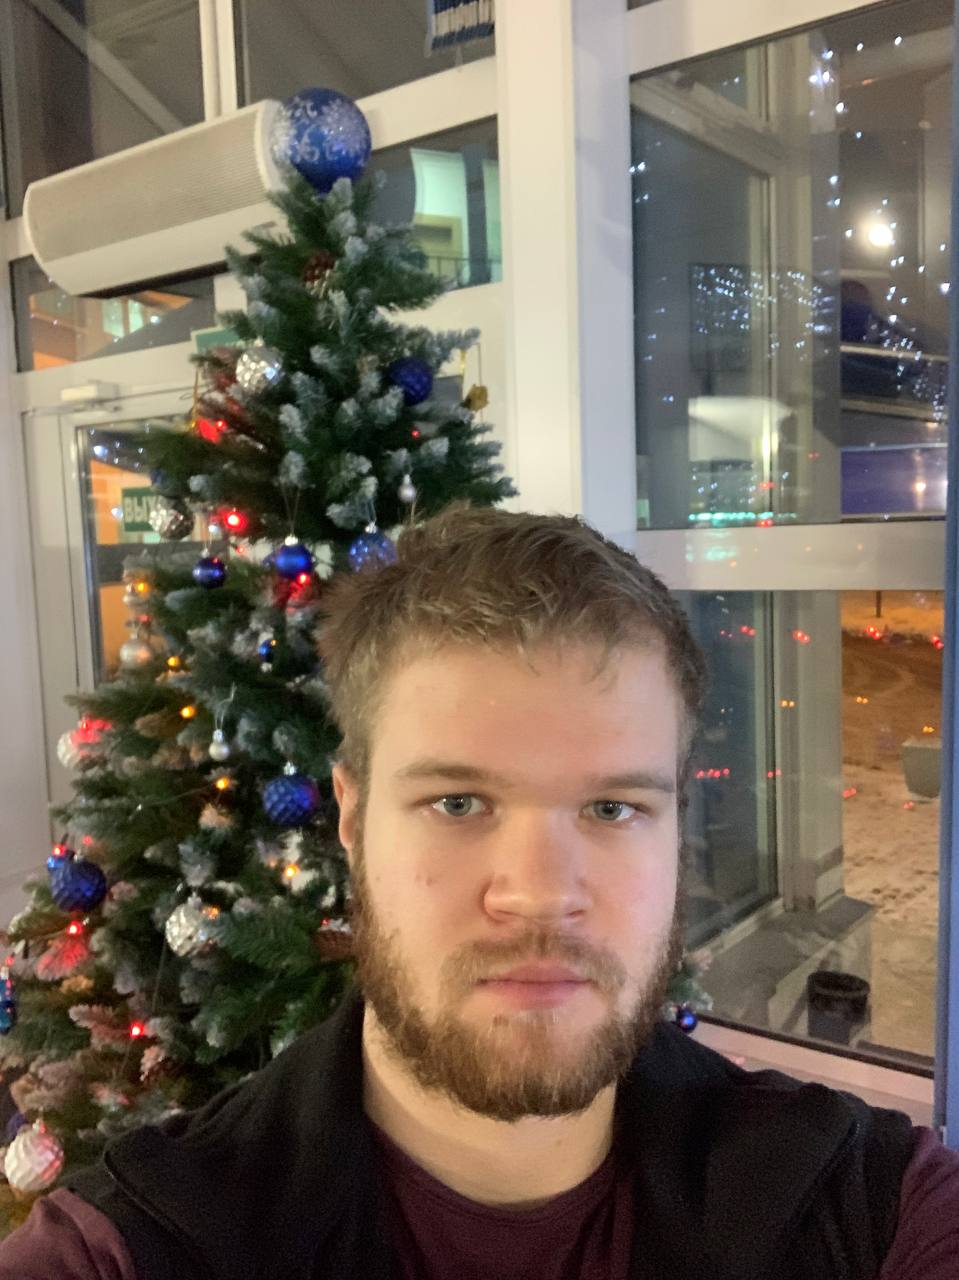

In [31]:
from PIL import Image
Image.open('Selfie.jpg')

*"my famous glance into void in the picture"*

I would like to get accepted to PhD. Also, in January I would love to start studying instead of filling endless application forms.